## mini project

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import * 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import  tensorflow as tf

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def plot_loss_acc(model):
    his_df = pd.DataFrame(model.history)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].plot(his_df[['acc', 'val_acc']], label = ['Training', 'Validataion'])        
    axes[0].set_title('Accarcy')
    axes[0].grid(True)
    axes[0].set_xlabel('epoch')
    
    axes[1].plot(his_df[['loss', 'val_loss']], label = ['Training', 'Validataion'])     
    axes[1].set_title('loss')
    axes[1].grid(True)
    axes[1].set_xlabel('epoch')
    plt.show()

In [3]:
tr_dir = './data/Fast Food Classification V2/Train'
val_dir = './data/Fast Food Classification V2/Valid'
te_dir = './data/Fast Food Classification V2/Test'


image_gen = ImageDataGenerator(rescale = (1/255.))
tr_gen = image_gen.flow_from_directory(tr_dir, 
                                      batch_size = 32, 
                                      target_size = (244, 244),
                                      class_mode = 'categorical', 
                                      seed = 2020)

val_gen = image_gen.flow_from_directory(val_dir, 
                                      batch_size = 32, 
                                      target_size = (244, 244), 
                                      class_mode = 'categorical', 
                                      seed = 2020)

te_gen = image_gen.flow_from_directory(te_dir, 
                                      batch_size = 32, 
                                      target_size = (244, 244), 
                                      class_mode = 'categorical', 
                                      seed = 2020)

Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.


In [4]:
class_labels= ['Baked Potato', 'Burger', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Pizza', 'Sandwich', 'Taco', 'Taquito']

In [7]:
batch = next(tr_gen)
images, labels = batch[0], batch[1]

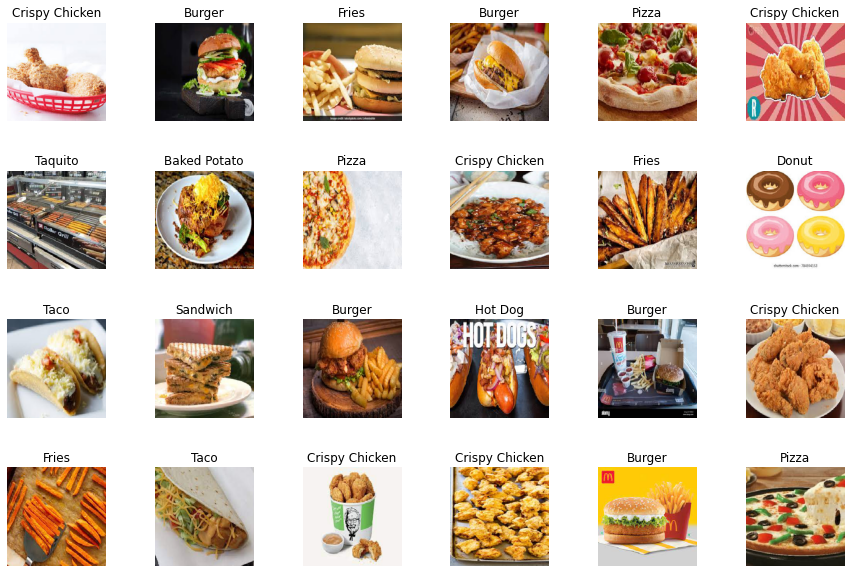

In [8]:
class_labels= ['Baked Potato', 'Burger', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Pizza', 'Sandwich', 'Taco', 'Taquito']
batch = next(tr_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize=(15, 10))
for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(class_labels[np.argmax(labels, axis = 1)[i]])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

58889256/58889256 [==============================] - 3s 0us/step


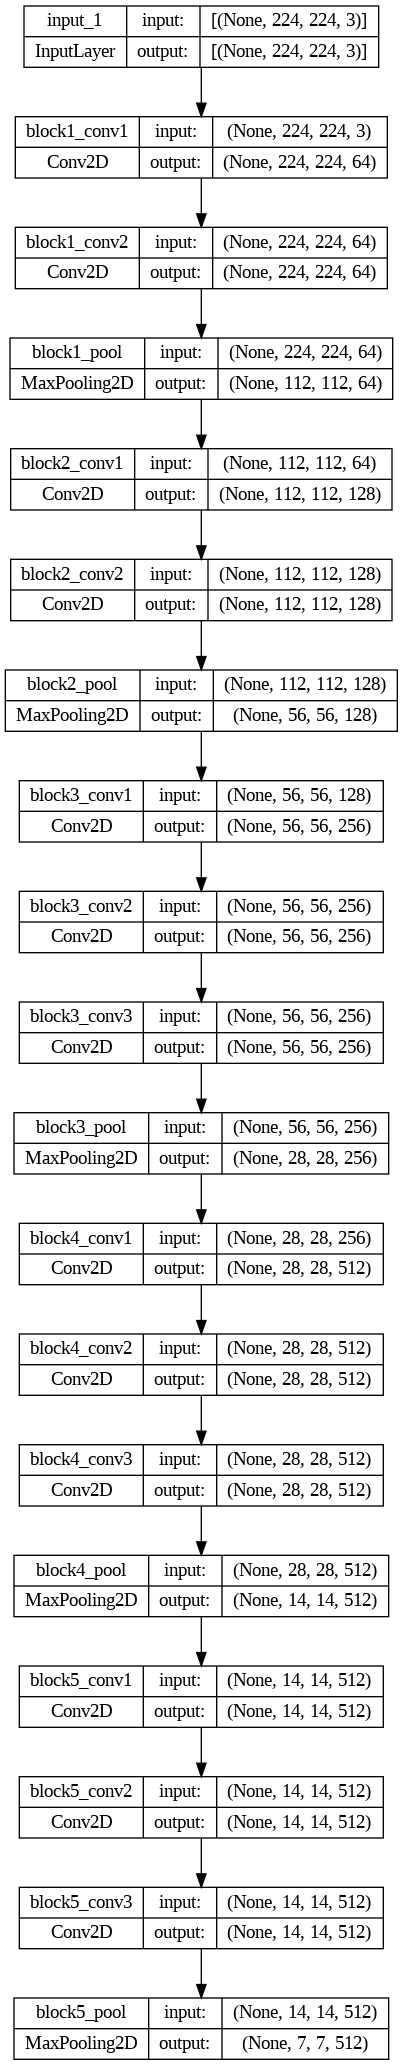

In [9]:
from tensorflow.keras.applications import VGG16

pre_trained_base = VGG16(include_top = False, 
                         weights="imagenet",
                         input_shape = [224, 224, 3])

pre_trained_base.trainable = False

plot_model(pre_trained_base, show_shapes = True, show_layer_names= True, to_file = 'vgg16.png')

In [20]:
class vgg_bulid(Model):
    def __init__(self, pre_trained_base):
        super (vgg_bulid, self).__init__()
        self.pre_vgg16 = pre_trained_base
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = Sequential([
            tf.keras.layers.Dense(256, 
                  kernel_initializer = 'he_uniform'), 
            tf.keras.layers.LeakyReLU(alpha = 0.1), 
            tf.keras.layers.Dropout(0.5)
        ])
        self.fc2 = Sequential([
            tf.keras.layers.Dense(256, 
                  kernel_initializer = 'he_uniform'), 
            tf.keras.layers.LeakyReLU(alpha = 0.2), 
            tf.keras.layers.Dropout(0.5)
        ])
        self.soft_max = tf.keras.layers.Dense(10, activation = 'softmax')

    def call(self, x):
        ret = self.pre_vgg16(x)
        ret = self.flatten(ret)
        ret = self.fc1(ret)
        ret = self.fc2(ret)
        return self.soft_max(ret)

In [21]:
vgg_model = vgg_bulid(pre_trained_base)
vgg_model(tf.keras.Input(shape = (224, 224, 3)))

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'vgg_bulid_1')>

In [22]:
vgg_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,),
                 loss = 'categorical_crossentropy',
                  metrics = ['acc'])

In [23]:
import datetime as dt

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)


checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = f'/content/drive/MyDrive/4조/Team Project/sojung/vgg_{dt.datetime.now().ctime()}.ckp', 
                                                save_weights_only = True, 
                                                save_best_only = True, 
                                                monitor = 'val_loss',
                                                verbose = 1)

In [24]:
vgg_his = vgg_model.fit(tr_gen, 
                        validation_data = val_gen, 
                        epochs = 30, 
                        callbacks = [checkpoint])

Epoch 1/30
469/469 [==============================] - ETA: 0s - loss: 2.1534 - acc: 0.3602
Epoch 1: val_loss improved from inf to 1.39826, saving model to /content/drive/MyDrive/4조/Team Project/sojung/vgg_Tue Mar 28 01:42:45 2023.ckp
469/469 [==============================] - 99s 208ms/step - loss: 2.1534 - acc: 0.3602 - val_loss: 1.3983 - val_acc: 0.5500
Epoch 2/30
469/469 [==============================] - ETA: 0s - loss: 1.5098 - acc: 0.5230
Epoch 2: val_loss improved from 1.39826 to 1.30646, saving model to /content/drive/MyDrive/4조/Team Project/sojung/vgg_Tue Mar 28 01:42:45 2023.ckp
469/469 [==============================] - 100s 212ms/step - loss: 1.5098 - acc: 0.5230 - val_loss: 1.3065 - val_acc: 0.5923
Epoch 3/30
469/469 [==============================] - ETA: 0s - loss: 1.2351 - acc: 0.6051
Epoch 3: val_loss improved from 1.30646 to 1.24101, saving model to /content/drive/MyDrive/4조/Team Project/sojung/vgg_Tue Mar 28 01:42:45 2023.ckp
469/469 [=============================

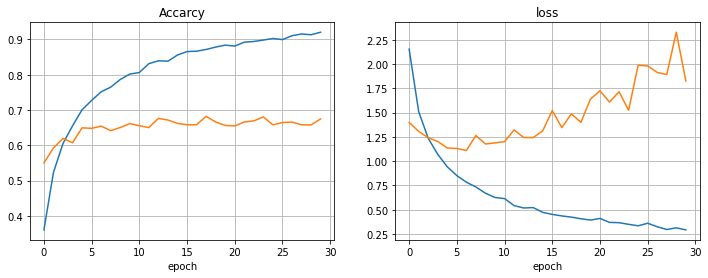

In [28]:
plot_loss_acc(vgg_his)

In [29]:
vgg_model.evaluate(te_gen)

47/47 [==============================] - 11s 244ms/step - loss: 1.5956 - acc: 0.7013


[1.5955734252929688, 0.7013333439826965]

47/47 [==============================] - 9s 184ms/step


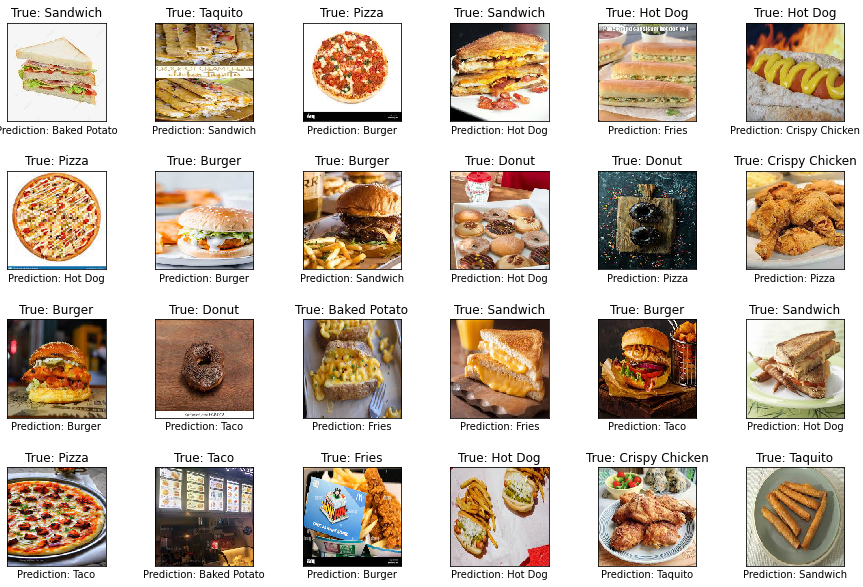

In [30]:
y_pred = np.argmax(vgg_model.predict(te_gen), axis = -1)

batch = next(tr_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize=(15, 10))
for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.imshow(images[i], interpolation = 'nearest')
#     plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f'Prediction: {class_labels[y_pred[i]]}')
    plt.title('True: ' + class_labels[np.argmax(labels, axis = 1)[i]])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### 가중치를 imagenet이 아닌 내가 학습시킴

58889256/58889256 [==============================] - 3s 0us/step


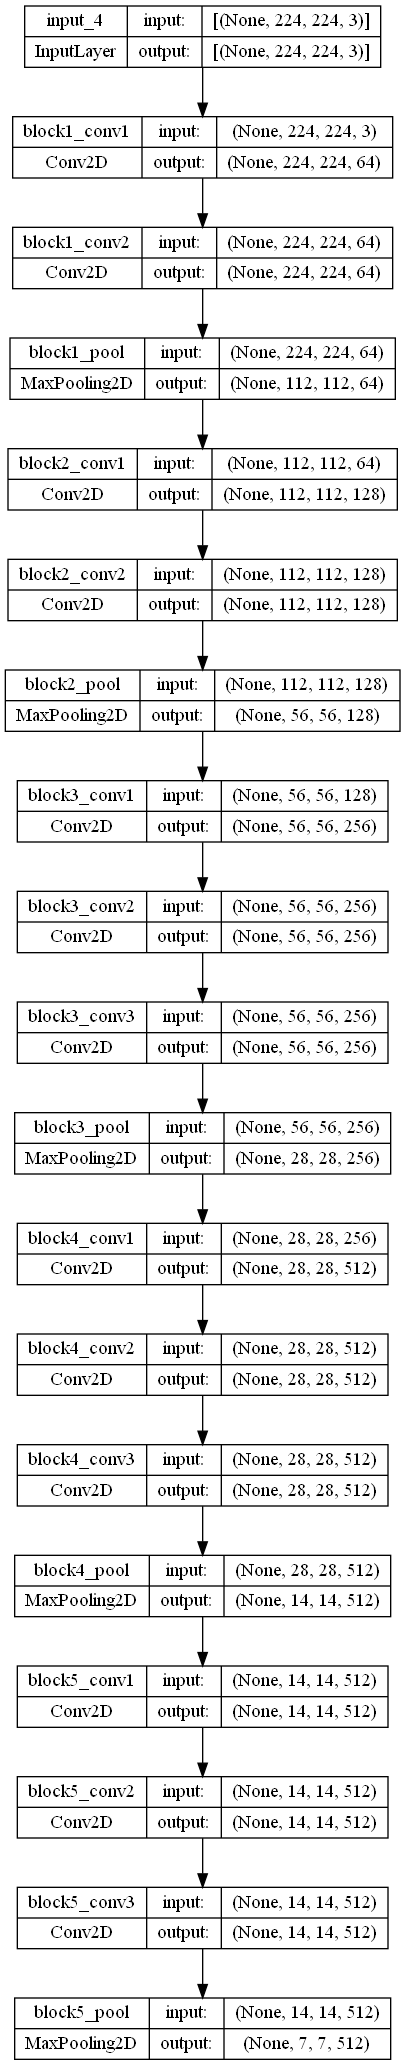

In [14]:
from tensorflow.keras.applications import VGG16

pre_trained_base = VGG16(include_top = False, 
                         weights="imagenet",
                         input_shape = [224, 224, 3])

pre_trained_base.trainable = False

plot_model(pre_trained_base, show_shapes = True, show_layer_names= True, to_file = 'vgg16.png')

In [15]:
class vgg_bulid(Model):
    def __init__(self, pre_trained_base):
        super (vgg_bulid, self).__init__()
        self.pre_vgg16 = pre_trained_base
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = Sequential([
            tf.keras.layers.Dense(256, 
                  kernel_initializer = 'he_uniform'),
            tf.keras.layers.LeakyReLU(alpha = 0.1), 
            tf.keras.layers.BatchNormalization(), 
            tf.keras.layers.Dropout(0.5)
        ])
        self.fc2 = Sequential([
            tf.keras.layers.Dense(256, 
                  kernel_initializer = 'he_uniform'),
            
            tf.keras.layers.LeakyReLU(alpha = 0.2), 
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.5)
        ])
        self.soft_max = tf.keras.layers.Dense(10, activation = 'softmax')

    def call(self, x):
        ret = self.pre_vgg16(x)
        ret = self.flatten(ret)
        ret = self.fc1(ret)
        ret = self.fc2(ret)
        return self.soft_max(ret)

In [16]:
vgg_model2 = vgg_bulid(vgg16_not_weight)
vgg_model2(tf.keras.Input(shape = (224, 224, 3)))
vgg_model2.summary()

Model: "vgg_bulid_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 sequential_4 (Sequential)   (None, 256)               6423808   
                                                                 
 sequential_5 (Sequential)   (None, 256)               66816     
                                                                 
 dense_8 (Dense)             multiple                  2570      
                                                                 
Total params: 21,207,882
Trainable params: 21,206,858
Non-trainable params: 1,024
_________________________________________________________________


In [20]:
import datetime as dt

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)


checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = f'./saving/vgg_{dt.datetime.now().ctime()}.ckp', 
                                                save_weights_only = True, 
                                                save_best_only = True, 
                                                monitor = 'val_loss',
                                                verbose = 1)

In [21]:
vgg_model2.compile(optimizer = 'adam', 
                 loss = 'categorical_crossentropy',
                  metrics = ['acc'])

In [ ]:
vgg_his2 = vgg_model2.fit(tr_gen, 
                        validation_data = val_gen, 
                        epochs = 30, 
                        callbacks = [checkpoint])

Epoch 1/30
249/469 [==============>...............] - ETA: 1:30:03 - loss: 2.8997 - acc: 0.1416

C:\ProgramData\Anaconda3\envs\py37_tensorflow\lib\site-packages\PIL\Image.py:997: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


348/469 [=====================>........] - ETA: 55:19 - loss: 2.8321 - acc: 0.1418

In [ ]:
plot_loss_acc(vgg_his2)